# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [266]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [267]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [268]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [269]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [270]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [271]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url)

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_data, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19350993,
            "id": 1,
            "last_updated": 1681940690,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 562172027136,
                    "percent_change_1h": -0.792235712699135,
                    "percent_change_24h": -4.37371065654939,
                    "percent_change_7d": -4.19181190839922,
                    "percentage_change_1h": -0.792235712699135,
                    "percentage_change_24h": -4.37371065654939,
                    "percentage_change_7d": -4.19181190839922,
                    "price": 28992.0,
                    "volume_24h": 22516599886
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19350993,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [272]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url)

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_data, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 119344051,
            "id": 1027,
            "last_updated": 1681940691,
            "max_supply": 119344051,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 234075773810,
                    "percent_change_1h": -0.947378266150255,
                    "percent_change_24h": -6.17218687744808,
                    "percent_change_7d": 3.56126741740568,
                    "percentage_change_1h": -0.947378266150255,
                    "percentage_change_24h": -6.17218687744808,
                    "percentage_change_7d": 3.56126741740568,
                    "price": 1960.35,
                    "volume_24h": 14930103626
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119344051,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cr

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [273]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response.json()['data']['1']['quotes']['USD']['price']


# Print the current price of BTC
print(f"Current Bitcoin price in USD ${btc_price}")



Current Bitcoin price in USD $28319.0


In [274]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response.json()['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"Current Ethereum price in USD ${eth_price}")

Current Ethereum price in USD $1946.7


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [275]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price


# Print current value of your holding in BTC
print(f"Current value of your holding in BTC ${btc_value},")


Current value of your holding in BTC $33982.799999999996,


In [276]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * btc_price

# Print current value of your holding in ETH
print(f"Current value of your holding in BTC ${eth_value}")


Current value of your holding in BTC $150090.69999999998


In [277]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value


# Print current cryptocurrency wallet balance
print(f"The total value of your cryptocurrency wallet is ${total_crypto_wallet:.2f}")


The total value of your cryptocurrency wallet is $184073.50


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [278]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [279]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

display(type(alpaca_api_key))
display(type(alpaca_secret_key))

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [280]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]
# Set timeframe to 1Day
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [281]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
closing_prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Review the first 5 rows of the Alpaca DataFrame
closing_prices_df.head()

SPY                                   \
                             open    high    low   close    volume   
timestamp                                                            
2020-08-07 04:00:00+00:00  333.28  334.88  332.3  334.57  57282821   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.395   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-08-07 04:00:00+00:00  119.43  5559066       15246  119.475306

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [282]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(closing_prices_df["AGG"]["close"])

# Print the AGG closing price
print(f"${agg_close_price}")
               

$119.43


In [283]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(closing_prices_df["SPY"]["close"])

# Print the SPY closing price
print(f"${spy_close_price}")


$334.57


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [284]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f"${agg_value}")

$23886.0


In [285]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f"${spy_value}")

$36802.7


In [286]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f" ${total_stocks_bonds}")

 $60688.7


In [287]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f" ${total_portfolio}")

 $244762.19999999995


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [288]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data    

[184073.49999999997, 60688.7]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [289]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    savings_data, 
    columns=["amount"], 
    index=["crypto", "stock/bond"])


# Display the savings_df DataFrame
savings_df

,amount
crypto,184073.5
stock/bond,60688.7


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<Axes: title={'center': 'Total Value of Portfolio'}, ylabel='amount'>

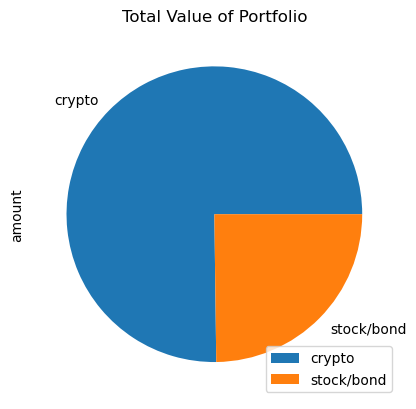

In [290]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot(kind='pie', y='amount', title="Total Value of Portfolio")

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [291]:
# Set member's monthly income to 12000
monthly_income = 12000

# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [292]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE
# Check if the total portfolio is large enough to fund the emergency fund
emergency_fund_value = monthly_income * 3

if total_portfolio > emergency_fund_value:
    print("Congratulations! Your total portfolio value is greater than your emergency fund value.")
elif total_portfolio == emergency_fund_value:
    print("Congratulations! You have reached your emergency fund goal.")
else:
    remaining_amount = emergency_fund_value - total_portfolio
    print(f"You are {remaining_amount:.2f} dollars away from reaching your emergency fund goal.")


Congratulations! Your total portfolio value is greater than your emergency fund value.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [293]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2018-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-08-07", tz="America/New_York").isoformat()


In [294]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Reorganize the DataFrame
# Separate ticker data
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
historical_prices = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display both the first and last five rows of the DataFrame
historical_prices.head()
historical_prices.tail()

SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2021-08-02 04:00:00+00:00  440.34  440.9300  437.21  437.59  58330752   
2021-08-03 04:00:00+00:00  438.44  441.2800  436.10  441.15  57534514   
2021-08-04 04:00:00+00:00  439.78  441.1243  438.73  438.98  46469753   
2021-08-05 04:00:00+00:00  440.22  441.8500  439.88  441.76  38840294   
2021-08-06 04:00:00+00:00  442.10  442.9400  441.80  442.49  46862730   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2021-08-02 04:00:00+00:00      406413  438.944582  116.36  116.68  116.3050   
2021-08-03 04:00:00+00:00      409775  439.164437  116.56  116.69  116.5306   
2021-08-04 04:00:00+00:00      335732  439.704756  116.77  116.83  116.3000   
2021-08-05 04:00:00+00:00      258694  440.686551  116.46  116.48  116.2800   
2021-08-06 04:00:00+00:00      283559  442.305357  115.93  116.02  115.7800   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2021-08-02 04:00:00+00:00  116.54  5753265       21686  116.522392  
2021-08-03 04:00:00+00:00  116.58  3715197       14813  116.598361  
2021-08-04 04:00:00+00:00  116.57  4654034       17826  116.540786  
2021-08-05 04:00:00+00:00  116.31  3283363       12221  116.367864  
2021-08-06 04:00:00+00:00  115.79  3811240       11510  115.874090

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [295]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_sim = MCSimulation(
    portfolio_data = historical_prices,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
MC_sim.portfolio_data.head()

SPY                                      \
                             open     high      low   close    volume   
timestamp                                                               
2018-08-07 04:00:00+00:00  285.39  286.010  285.240  285.58  43427090   
2018-08-08 04:00:00+00:00  285.39  285.910  284.940  285.44  42273966   
2018-08-09 04:00:00+00:00  285.53  285.970  284.915  285.09  37130583   
2018-08-10 04:00:00+00:00  283.45  284.055  282.360  283.16  77399449   
2018-08-13 04:00:00+00:00  283.47  284.160  281.770  282.08  65970064   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-08-07 04:00:00+00:00      181015  285.635439          NaN  105.97   
2018-08-08 04:00:00+00:00      154349  285.479104    -0.000490  105.83   
2018-08-09 04:00:00+00:00      140980  285.455348    -0.001226  105.97   
2018-08-10 04:00:00+00:00      292690  283.350560    -0.006770  106.11   
2018-08-13 04:00:00+00:00      270772  282.691061    -0.003814  106.16   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2018-08-07 04:00:00+00:00  105.97  105.8250  105.85  2532774        9522   
2018-08-08 04:00:00+00:00  105.91  105.8000  105.85  1937527        9394   
2018-08-09 04:00:00+00:00  106.04  105.9329  106.00  2386756       10063   
2018-08-10 04:00:00+00:00  106.36  106.1100  106.23  4136487       12317   
2018-08-13 04:00:00+00:00  106.30  106.1501  106.29  2786308       13888   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-08-07 04:00:00+00:00  105.876672          NaN  
2018-08-08 04:00:00+00:00  105.848006     0.000000  
2018-08-09 04:00:00+00:00  105.993103     0.001417  
2018-08-10 04:00:00+00:00  106.238745     0.002170  
2018-08-13 04:00:00+00:00  106.241962     0.000565

In [296]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005034,0.993411,1.001318,1.012253,0.998623,1.007462,1.010184,0.997512,1.007750,1.005852,...,1.001718,1.000447,0.984094,1.015784,0.998490,1.004136,1.011440,1.009700,1.001198,1.003749
2,1.012074,1.003545,1.006746,1.022302,1.008313,1.004690,1.005968,1.004971,1.007577,1.001528,...,1.004313,1.011964,0.987589,1.024173,0.996367,1.010724,0.997049,1.003763,0.989658,1.003995
3,1.016104,1.000383,1.004884,1.019607,1.011036,1.002666,0.998850,1.007762,0.991977,0.994799,...,1.006065,1.019746,0.985018,1.018924,1.007996,1.031970,0.984402,1.001941,0.976760,1.001877
4,1.014641,1.013406,1.021722,1.011982,1.000289,1.003063,0.993078,1.004170,0.998504,0.999764,...,1.024256,1.020371,0.993851,0.999779,1.007948,1.038265,0.979355,1.004792,0.963816,0.997539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.091725,13.210022,21.479017,17.737728,143.753773,17.211549,16.405008,20.656927,61.442162,29.309586,...,8.050142,22.472598,62.375634,9.384033,59.174953,54.107108,30.768237,27.159316,10.180590,35.654612
7557,9.063889,13.364424,21.866058,17.701739,144.636296,17.409910,16.490807,20.388985,60.583032,29.690823,...,8.098122,22.592080,63.056113,9.353486,59.699423,54.668737,30.471683,26.828242,10.288719,35.786140
7558,8.912789,13.308857,21.676578,17.542519,145.986697,17.273016,16.470168,20.366657,60.820531,30.334298,...,8.179031,22.634187,63.907636,9.232584,59.828791,54.774026,30.558496,26.835939,10.249995,36.177150
7559,8.979837,13.291318,21.579594,17.497444,146.133984,17.190377,16.454836,20.154920,61.399378,29.901914,...,8.242637,22.657503,64.231679,9.171343,60.026351,53.730775,30.911658,26.752314,10.351776,36.412092


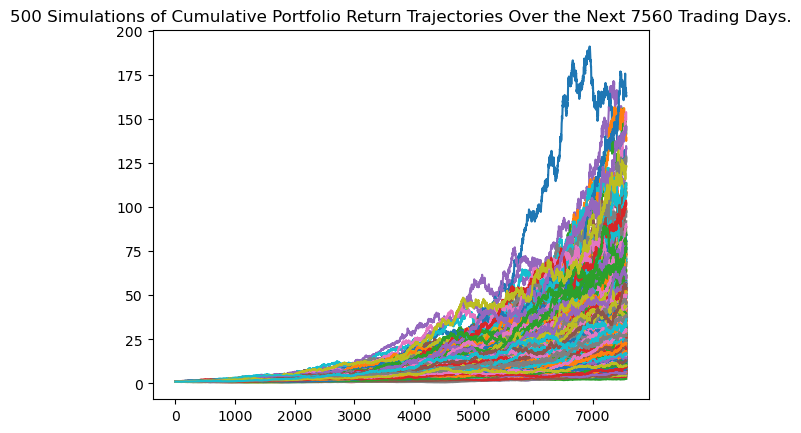

In [297]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_sim.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

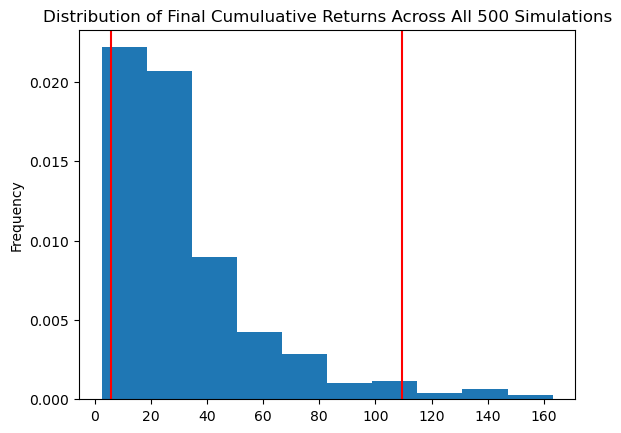

In [298]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dis_plot = MC_sim.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [299]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_sim_table = MC_sim.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
MC_sim_table

count           500.000000
mean             32.016525
std              26.671087
min               2.553954
25%              14.441768
50%              24.007142
75%              39.348106
max             163.124371
95% CI Lower      5.866266
95% CI Upper    109.610699
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [300]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"Current balance of the stock and bond portion of the portfolio: ${total_stocks_bonds}")


Current balance of the stock and bond portion of the portfolio: $60688.7


In [301]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(MC_sim_table[8] * total_stocks_bonds)
ci_upper_thirty_cumulative_return = round(MC_sim_table[9] * total_stocks_bonds)


# Print the result of your calculations
print(f"There is a 95% chance that with a 60, 40 for SPY and AGG weight portfolio over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")

There is a 95% chance that with a 60, 40 for SPY and AGG weight portfolio over the next 30 years will end within in the range of $356016 and $6652131.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [302]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
ten_year_sim = MCSimulation(
    portfolio_data = historical_prices,
    weights = [.80, .20],
    num_simulation = 500,
    num_trading_days = 252*10
)
# Review the simulation input data
ten_year_sim.portfolio_data.head()

SPY                                      \
                             open     high      low   close    volume   
timestamp                                                               
2018-08-07 04:00:00+00:00  285.39  286.010  285.240  285.58  43427090   
2018-08-08 04:00:00+00:00  285.39  285.910  284.940  285.44  42273966   
2018-08-09 04:00:00+00:00  285.53  285.970  284.915  285.09  37130583   
2018-08-10 04:00:00+00:00  283.45  284.055  282.360  283.16  77399449   
2018-08-13 04:00:00+00:00  283.47  284.160  281.770  282.08  65970064   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-08-07 04:00:00+00:00      181015  285.635439          NaN  105.97   
2018-08-08 04:00:00+00:00      154349  285.479104    -0.000490  105.83   
2018-08-09 04:00:00+00:00      140980  285.455348    -0.001226  105.97   
2018-08-10 04:00:00+00:00      292690  283.350560    -0.006770  106.11   
2018-08-13 04:00:00+00:00      270772  282.691061    -0.003814  106.16   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2018-08-07 04:00:00+00:00  105.97  105.8250  105.85  2532774        9522   
2018-08-08 04:00:00+00:00  105.91  105.8000  105.85  1937527        9394   
2018-08-09 04:00:00+00:00  106.04  105.9329  106.00  2386756       10063   
2018-08-10 04:00:00+00:00  106.36  106.1100  106.23  4136487       12317   
2018-08-13 04:00:00+00:00  106.30  106.1501  106.29  2786308       13888   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-08-07 04:00:00+00:00  105.876672          NaN  
2018-08-08 04:00:00+00:00  105.848006     0.000000  
2018-08-09 04:00:00+00:00  105.993103     0.001417  
2018-08-10 04:00:00+00:00  106.238745     0.002170  
2018-08-13 04:00:00+00:00  106.241962     0.000565

In [303]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989859,0.989024,0.981606,0.982898,0.988531,0.982736,1.010405,1.042453,0.996609,1.010641,...,0.989920,1.004713,0.997049,0.990125,1.007323,1.000677,0.999140,1.020377,1.011157,1.006229
2,1.009543,0.991946,0.980895,0.996824,0.990035,0.983946,1.010618,1.031244,1.008269,1.000593,...,0.986889,0.996149,0.993205,0.992372,1.014994,0.991215,0.997795,1.021568,1.001462,1.021628
3,1.001816,1.015993,0.972702,1.004544,0.997846,0.988307,0.992008,1.022008,1.020167,1.005897,...,0.982413,0.990989,0.993438,0.989995,1.017120,0.989695,0.992844,1.031792,1.010978,1.025347
4,1.001792,1.021631,0.967332,1.013031,1.002348,0.989262,0.997099,1.029142,1.020375,1.009845,...,0.996072,1.004159,1.006018,0.994077,1.014504,0.983504,0.998749,1.026870,1.013709,1.026702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.613187,1.864105,3.703010,2.782357,2.269941,2.600533,1.616091,5.647564,2.520789,1.650921,...,3.784954,4.061753,5.065845,6.176251,1.730610,7.501733,1.690806,5.314977,1.224290,5.910927
2517,2.600172,1.907238,3.723354,2.755003,2.266075,2.598518,1.616713,5.618335,2.516473,1.652520,...,3.832731,4.042188,4.952275,6.215127,1.731055,7.551533,1.691251,5.322260,1.213823,6.017712
2518,2.599920,1.901387,3.674383,2.812177,2.237610,2.618638,1.630237,5.583450,2.511863,1.633411,...,3.776906,4.010362,4.978132,6.138754,1.728429,7.513112,1.665087,5.311909,1.236570,6.032999
2519,2.592225,1.892676,3.708368,2.836341,2.216969,2.610570,1.612787,5.727055,2.482805,1.627243,...,3.756058,4.014179,4.904447,6.158332,1.709835,7.542976,1.649238,5.299156,1.251504,6.019288


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

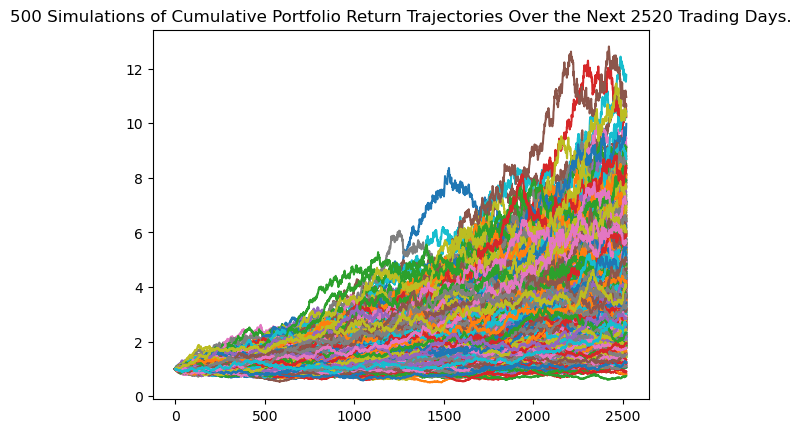

In [207]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
ten_year_sim.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

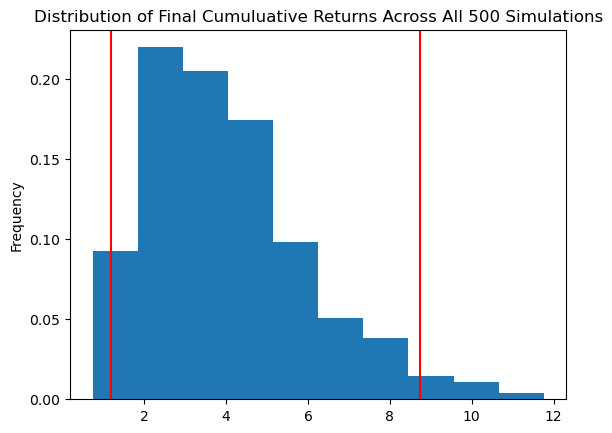

In [208]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
ten_year_sim.plot_distribution()

In [209]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
ten_year_sim = ten_year_sim.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
ten_year_sim

/Users/rosalinda/git/financial_planning_tools/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              4.031863
std               1.997204
min               0.740693
25%               2.609201
50%               3.684152
75%               5.004898
max              11.760031
95% CI Lower      1.180012
95% CI Upper      8.747694
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [219]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"Current balance of the stock and bond portion of the portfolio: ${total_stocks_bonds}")


Current balance of the stock and bond portion of the portfolio: $60688.7


In [224]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(ten_year_sim[8] * total_stocks_bonds, 2)
ci_upper_ten_cumulative_return = round(ten_year_sim[9] * total_stocks_bonds, 2)

# Print the result of your calculations
print(f"There is a 95% chance that with a 80, 20 for SPY and AGG weight portfolio over the next 30 years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")

There is a 95% chance that with a 80, 20 for SPY and AGG weight portfolio over the next 30 years will end within in the range of $71613.41 and $530886.16.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?